In [2]:
import pandas as pd

df = pd.read_csv("creditcard.csv")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape



(284807, 31)

In [8]:
df['Class'].value_counts()


,count
Class,
0,284315
1,492


In [9]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


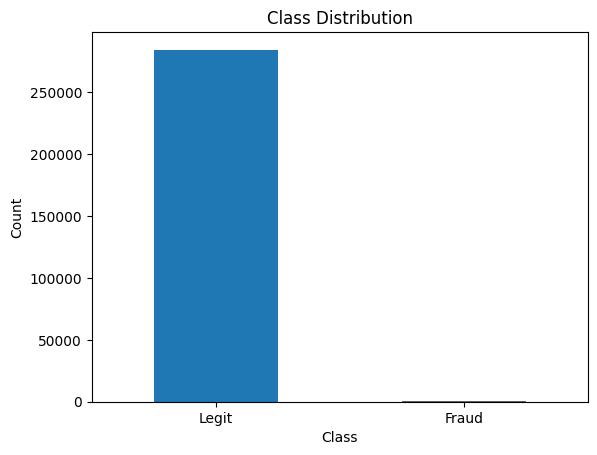

In [10]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xticks([0,1], ['Legit','Fraud'], rotation=0)
plt.ylabel("Count")
plt.show()


Analyze Transaction Amount

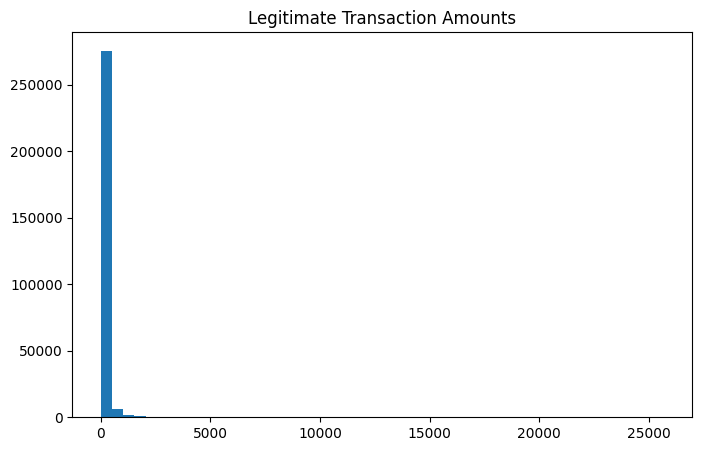

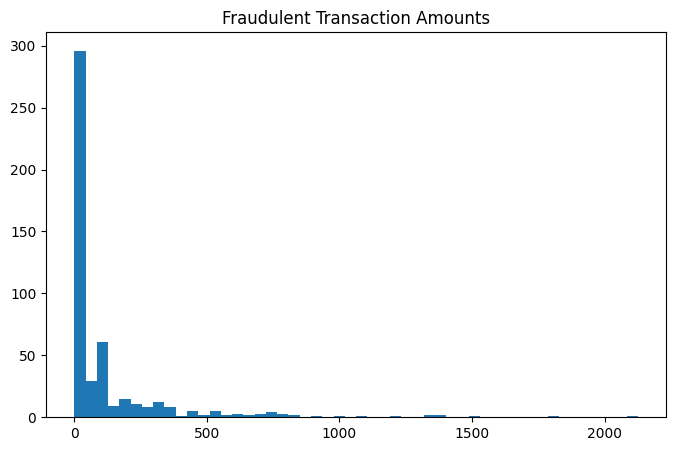

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [13]:
plt.figure(figsize=(8,5))
plt.hist(df[df['Class']==0]['Amount'], bins=50)
plt.title("Legitimate Transaction Amounts")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(df[df['Class']==1]['Amount'], bins=50)
plt.title("Fraudulent Transaction Amounts")
plt.show()
df.groupby('Class')['Amount'].describe()


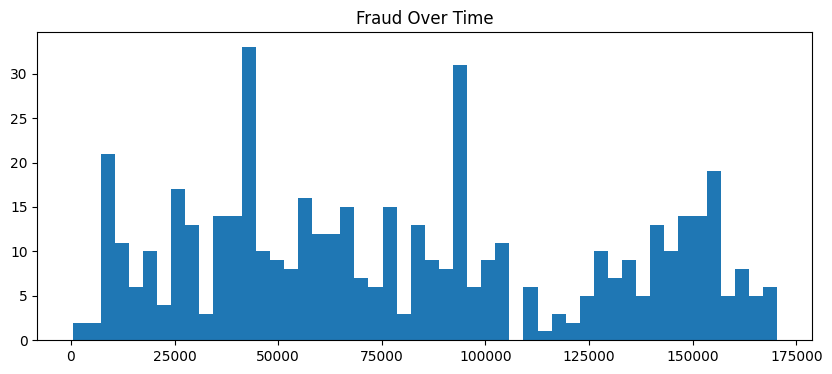

In [14]:
plt.figure(figsize=(10,4))
plt.hist(df[df['Class']==1]['Time'], bins=50)
plt.title("Fraud Over Time")
plt.show()


Correlation Matrix (Signal Detection)

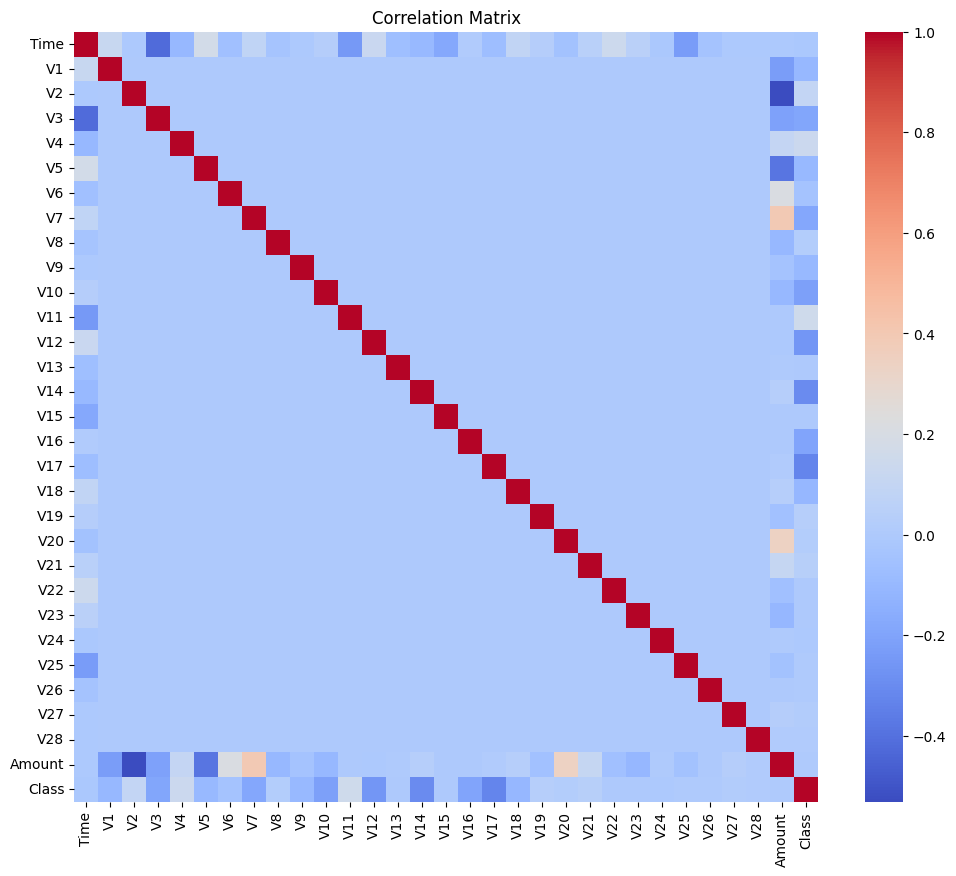

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


In [15]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
df.corr()['Class'].sort_values(ascending=False)


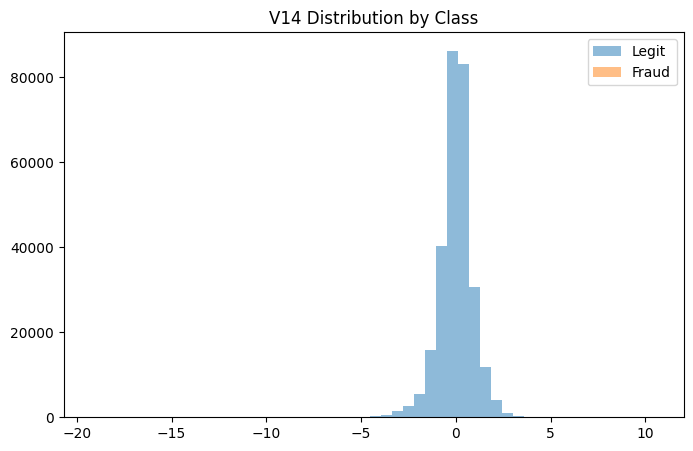

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df[df['Class']==0]['V14'], bins=50, alpha=0.5, label='Legit')
plt.hist(df[df['Class']==1]['V14'], bins=50, alpha=0.5, label='Fraud')
plt.legend()
plt.title("V14 Distribution by Class")
plt.show()


In [17]:
X = df.drop('Class', axis=1)
y = df['Class']


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [20]:
print("Train Fraud Ratio:", y_train.mean())
print("Test Fraud Ratio:", y_test.mean())


Train Fraud Ratio: 0.001729245759178389
Test Fraud Ratio: 0.0017204452090867595


In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

print(classification_report(y_test, y_pred_base))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
cm_base = confusion_matrix(y_test, y_pred_base)
cm_base



array([[56864,     0],
       [   98,     0]])

In [25]:
fn_base = cm_base[1][0]
print("Baseline False Negatives:", fn_base)


Baseline False Negatives: 98


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',   # VERY IMPORTANT
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [27]:
y_pred_rf = rf.predict(X_test)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf
fn_rf = cm_rf[1][0]
print("Random Forest False Negatives:", fn_rf)


Random Forest False Negatives: 24


In [30]:
reduction = (fn_base - fn_rf) / fn_base * 100
print(f"False Negative Reduction: {reduction:.2f}%")


False Negative Reduction: 75.51%


In [31]:
y_probs_rf = rf.predict_proba(X_test)[:,1]


In [32]:
threshold = 0.3
y_pred_custom = (y_probs_rf > threshold).astype(int)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_custom))

cm_custom = confusion_matrix(y_test, y_pred_custom)
fn_custom = cm_custom[1][0]

print("Custom Threshold False Negatives:", fn_custom)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Custom Threshold False Negatives: 16


In [34]:
reduction_custom = (fn_base - fn_custom) / fn_base * 100
print(f"False Negative Reduction (Custom): {reduction_custom:.2f}%")


False Negative Reduction (Custom): 83.67%


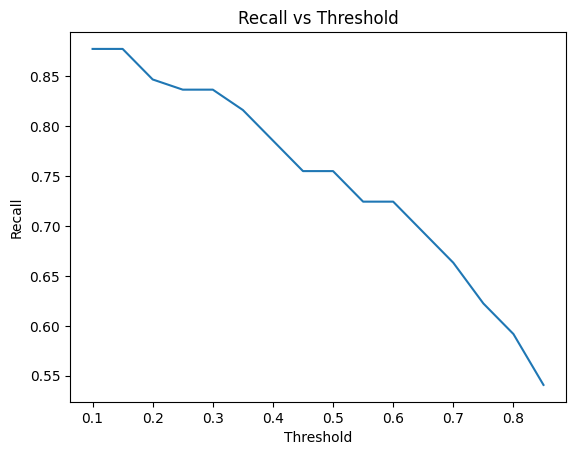

In [35]:
import numpy as np
from sklearn.metrics import recall_score

thresholds = np.arange(0.1, 0.9, 0.05)
recalls = []

for t in thresholds:
    y_pred_temp = (y_probs_rf > t).astype(int)
    recalls.append(recall_score(y_test, y_pred_temp))

import matplotlib.pyplot as plt
plt.plot(thresholds, recalls)
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold")
plt.show()


In [36]:
!pip install xgboost


In [37]:
from xgboost import XGBClassifier


In [38]:
neg = y_train.value_counts()[0]
pos = y_train.value_counts()[1]

scale_pos_weight = neg / pos
scale_pos_weight


np.float64(577.2868020304569)

In [39]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [40]:
y_pred_xgb = xgb.predict(X_test)


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



array([[56854,    10],
       [   15,    83]])

In [42]:
fn_xgb = cm_xgb[1][0]
print("XGBoost False Negatives:", fn_xgb)


XGBoost False Negatives: 15


In [43]:
reduction_xgb = (fn_base - fn_xgb) / fn_base * 100
print(f"False Negative Reduction (XGB): {reduction_xgb:.2f}%")


False Negative Reduction (XGB): 84.69%


In [48]:
y_probs_xgb = xgb.predict_proba(X_test)[:,1]


In [47]:
threshold = 0.3
y_pred_custom = (y_probs_xgb > threshold).astype(int)


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_custom))

cm_custom = confusion_matrix(y_test, y_pred_custom)
fn_custom = cm_custom[1][0]

print("False Negatives:", fn_custom)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

False Negatives: 15


In [50]:
reduction_custom = (fn_base - fn_custom) / fn_base * 100
print(f"False Negative Reduction: {reduction_custom:.2f}%")


False Negative Reduction: 84.69%


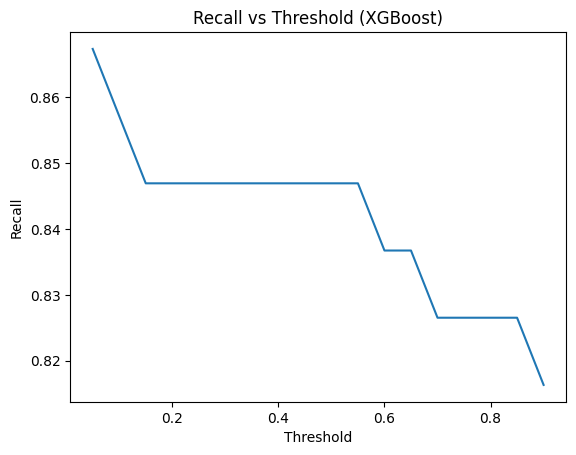

In [51]:
import numpy as np
from sklearn.metrics import recall_score

thresholds = np.arange(0.05, 0.95, 0.05)
recalls = []

for t in thresholds:
    y_temp = (y_probs_xgb > t).astype(int)
    recalls.append(recall_score(y_test, y_temp))

import matplotlib.pyplot as plt
plt.plot(thresholds, recalls)
plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title("Recall vs Threshold (XGBoost)")
plt.show()


In [52]:
from sklearn.metrics import precision_score

for t in thresholds:
    y_temp = (y_probs_xgb > t).astype(int)
    print(f"Threshold: {t:.2f}, Recall: {recall_score(y_test, y_temp):.3f}, Precision: {precision_score(y_test, y_temp):.3f}")


Threshold: 0.05, Recall: 0.867, Precision: 0.766
Threshold: 0.10, Recall: 0.857, Precision: 0.816
Threshold: 0.15, Recall: 0.847, Precision: 0.830
Threshold: 0.20, Recall: 0.847, Precision: 0.865
Threshold: 0.25, Recall: 0.847, Precision: 0.874
Threshold: 0.30, Recall: 0.847, Precision: 0.874
Threshold: 0.35, Recall: 0.847, Precision: 0.883
Threshold: 0.40, Recall: 0.847, Precision: 0.883
Threshold: 0.45, Recall: 0.847, Precision: 0.892
Threshold: 0.50, Recall: 0.847, Precision: 0.892
Threshold: 0.55, Recall: 0.847, Precision: 0.892
Threshold: 0.60, Recall: 0.837, Precision: 0.891
Threshold: 0.65, Recall: 0.837, Precision: 0.891
Threshold: 0.70, Recall: 0.827, Precision: 0.910
Threshold: 0.75, Recall: 0.827, Precision: 0.920
Threshold: 0.80, Recall: 0.827, Precision: 0.920
Threshold: 0.85, Recall: 0.827, Precision: 0.920
Threshold: 0.90, Recall: 0.816, Precision: 0.930


In [53]:
threshold = 0.55
y_pred_055 = (y_probs_xgb > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_055))

cm_055 = confusion_matrix(y_test, y_pred_055)
fn_055 = cm_055[1][0]

print("False Negatives:", fn_055)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

False Negatives: 15


In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [55]:
xgb_sm = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_sm.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [56]:
y_probs_sm = xgb_sm.predict_proba(X_test)[:,1]

threshold = 0.5
y_pred_sm = (y_probs_sm > threshold).astype(int)

print(classification_report(y_test, y_pred_sm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.88      0.79        98

    accuracy                           1.00     56962
   macro avg       0.86      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [57]:
y_probs_sm = xgb_sm.predict_proba(X_test)[:,1]


In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, confusion_matrix

thresholds = np.arange(0.05, 0.95, 0.05)

results = []

for t in thresholds:
    y_temp = (y_probs_sm > t).astype(int)

    recall = recall_score(y_test, y_temp)
    precision = precision_score(y_test, y_temp)

    cm = confusion_matrix(y_test, y_temp)
    fn = cm[1][0]

    fn_reduction = (fn_base - fn) / fn_base * 100

    results.append([t, recall, precision, fn, fn_reduction])

results_df = pd.DataFrame(results, columns=[
    "Threshold",
    "Recall",
    "Precision",
    "False Negatives",
    "FN Reduction (%)"
])

results_df


,Threshold,Recall,Precision,False Negatives,FN Reduction (%)
0,0.05,0.887755,0.312950,11,88.775510
1,0.10,0.877551,0.409524,12,87.755102
2,0.15,0.877551,0.494253,12,87.755102
3,0.20,0.877551,0.530864,12,87.755102
4,0.25,0.877551,0.569536,12,87.755102
5,0.30,0.877551,0.632353,12,87.755102
6,0.35,0.877551,0.656489,12,87.755102
7,0.40,0.877551,0.677165,12,87.755102
8,0.45,0.877551,0.699187,12,87.755102
9,0.50,0.877551,0.722689,12,87.755102


In [59]:
xgb_tuned = XGBClassifier(
    n_estimators=600,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_tuned.fit(X_train_sm, y_train_sm)

y_probs_tuned = xgb_tuned.predict_proba(X_test)[:,1]


In [60]:
xgb_tuned = XGBClassifier(
    n_estimators=800,
    max_depth=8,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=3,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_tuned.fit(X_train_sm, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=-1,
              num_parallel_tree=None, ...)

In [61]:
y_probs_tuned = xgb_tuned.predict_proba(X_test)[:,1]


In [62]:
thresholds = np.arange(0.05, 0.95, 0.05)

results_tuned = []

for t in thresholds:
    y_temp = (y_probs_tuned > t).astype(int)

    recall = recall_score(y_test, y_temp)
    precision = precision_score(y_test, y_temp)

    cm = confusion_matrix(y_test, y_temp)
    fn = cm[1][0]

    fn_reduction = (fn_base - fn) / fn_base * 100

    results_tuned.append([t, recall, precision, fn, fn_reduction])

results_tuned_df = pd.DataFrame(results_tuned, columns=[
    "Threshold",
    "Recall",
    "Precision",
    "False Negatives",
    "FN Reduction (%)"
])

results_tuned_df


,Threshold,Recall,Precision,False Negatives,FN Reduction (%)
0,0.05,0.897959,0.314286,10,89.795918
1,0.10,0.887755,0.418269,11,88.775510
2,0.15,0.887755,0.488764,11,88.775510
3,0.20,0.887755,0.540373,11,88.775510
4,0.25,0.887755,0.568627,11,88.775510
5,0.30,0.887755,0.621429,11,88.775510
6,0.35,0.887755,0.664122,11,88.775510
7,0.40,0.887755,0.679688,11,88.775510
8,0.45,0.887755,0.713115,11,88.775510
9,0.50,0.887755,0.737288,11,88.775510


In [63]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_probs_tuned)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.9797951503336281


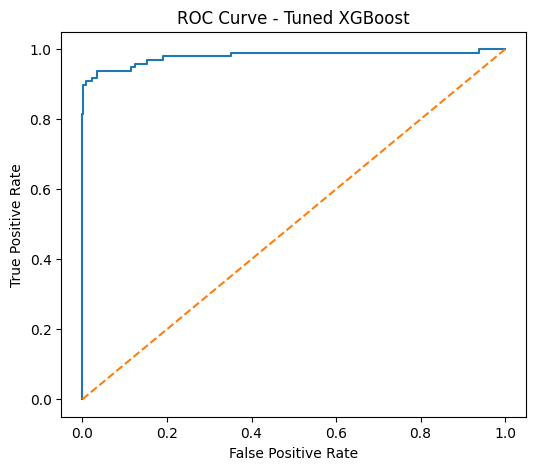

In [64]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs_tuned)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned XGBoost")
plt.show()


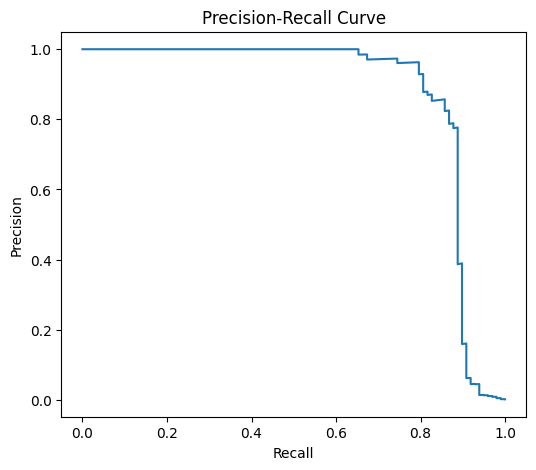

In [65]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_probs_tuned)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [66]:
test_results = X_test.copy()
test_results["Actual"] = y_test.values
test_results["Fraud_Probability"] = y_probs_tuned


In [67]:
def risk_bucket(prob):
    if prob > 0.7:
        return "High Risk"
    elif prob > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

test_results["Risk_Level"] = test_results["Fraud_Probability"].apply(risk_bucket)


In [68]:
test_results["Risk_Level"].value_counts()


,count
Risk_Level,
Low Risk,56834
High Risk,102
Medium Risk,26


In [69]:
pd.crosstab(test_results["Risk_Level"], test_results["Actual"])


Actual,0,1
Risk_Level,,
High Risk,18,84
Low Risk,56823,11
Medium Risk,23,3


In [70]:
test_results.to_csv("fraud_risk_scoring_output.csv", index=False)


In [71]:
from google.colab import files
files.download("fraud_risk_scoring_output.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>